# Project – Census Income Project

## Problem Statement:
In this project, initially you need to preprocess the data and then develop an
understanding of the different features of the data by performing exploratory
analysis and creating visualizations. Further, after having sufficient knowledge
about the attributes, you will perform a predictive task of classification to predict
whether an individual makes over 50,000 a year or less by using different
machine learning algorithms.

## Tasks To Be Performed:
1. Perform Exploratory Data Analysis to find key insights.
2. Use various machine learning algorithms to predict the response variable.
---

# EDA

In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [390]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [392]:
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [393]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

##### No missing values present, but a lot of rows with '?'

In [394]:
# Replace '?' with NaN for easier handling
df.replace('?', pd.NA, inplace=True)

In [395]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [396]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].mean(), inplace=True)

In [397]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Data Visualization

In [398]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


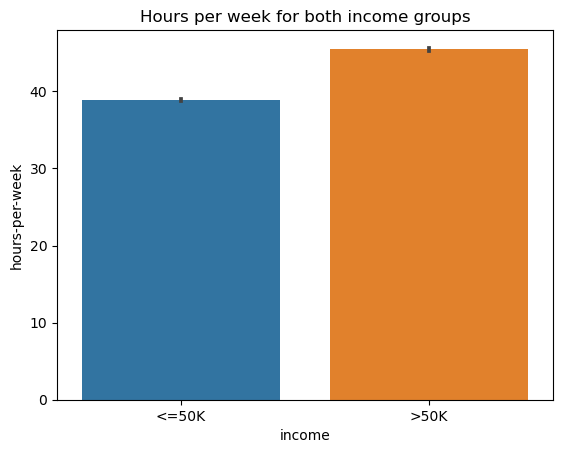

In [399]:
sns.barplot(data=df, y='hours-per-week', x='income')
plt.title("Hours per week for both income groups")
plt.show()

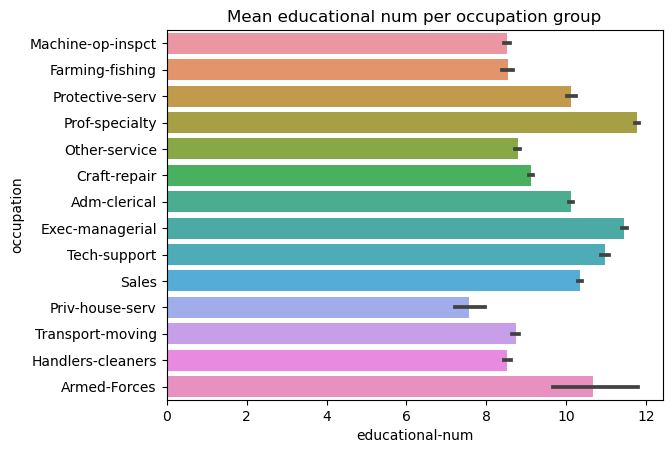

In [400]:
sns.barplot(data=df, y='occupation', x='educational-num')
plt.title("Mean educational num per occupation group")
plt.show()

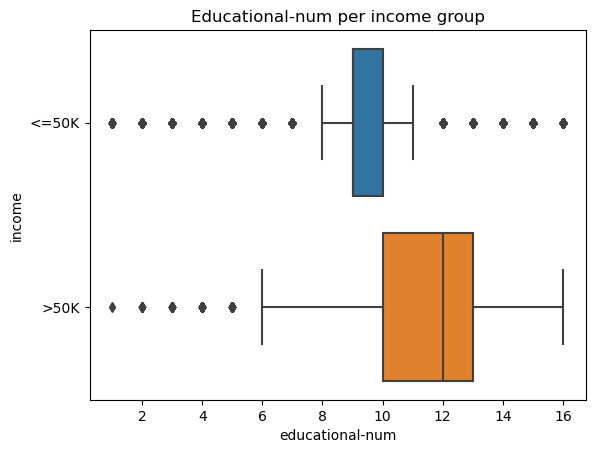

In [401]:
sns.boxplot(data=df, x='educational-num', y='income')
plt.title("Educational-num per income group")
plt.show()

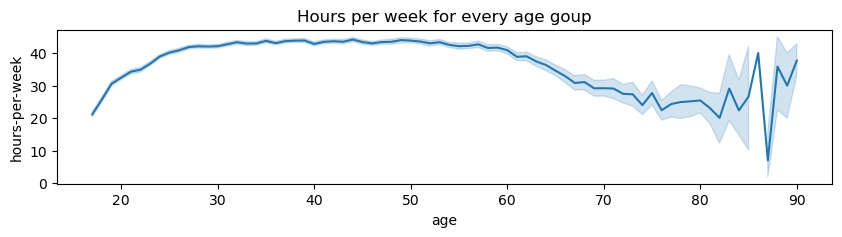

In [402]:
plt.figure(figsize=(10,2))
sns.lineplot(data=df, x='age', y='hours-per-week')
plt.title("Hours per week for every age goup")
plt.show()

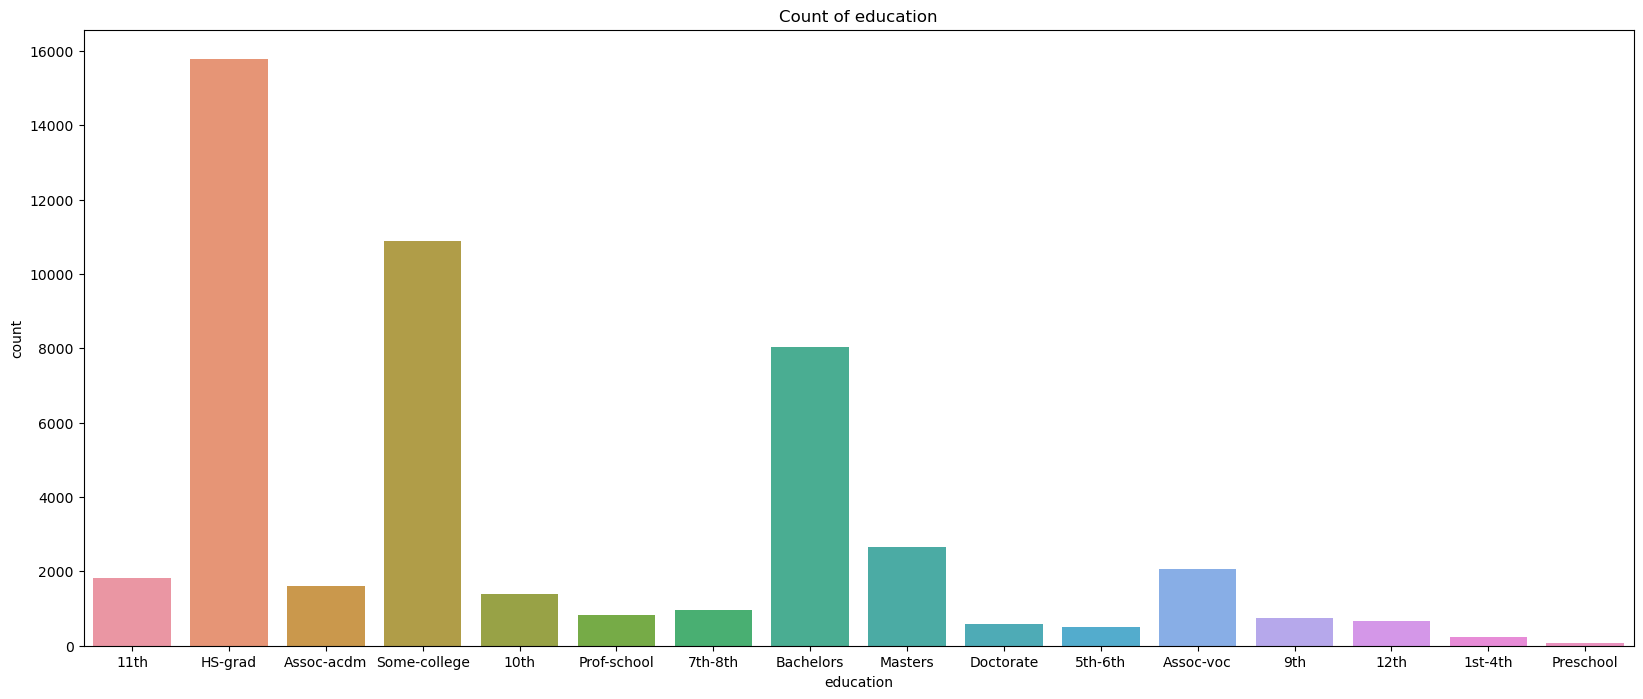

In [403]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='education')
plt.title("Count of education")
plt.show()

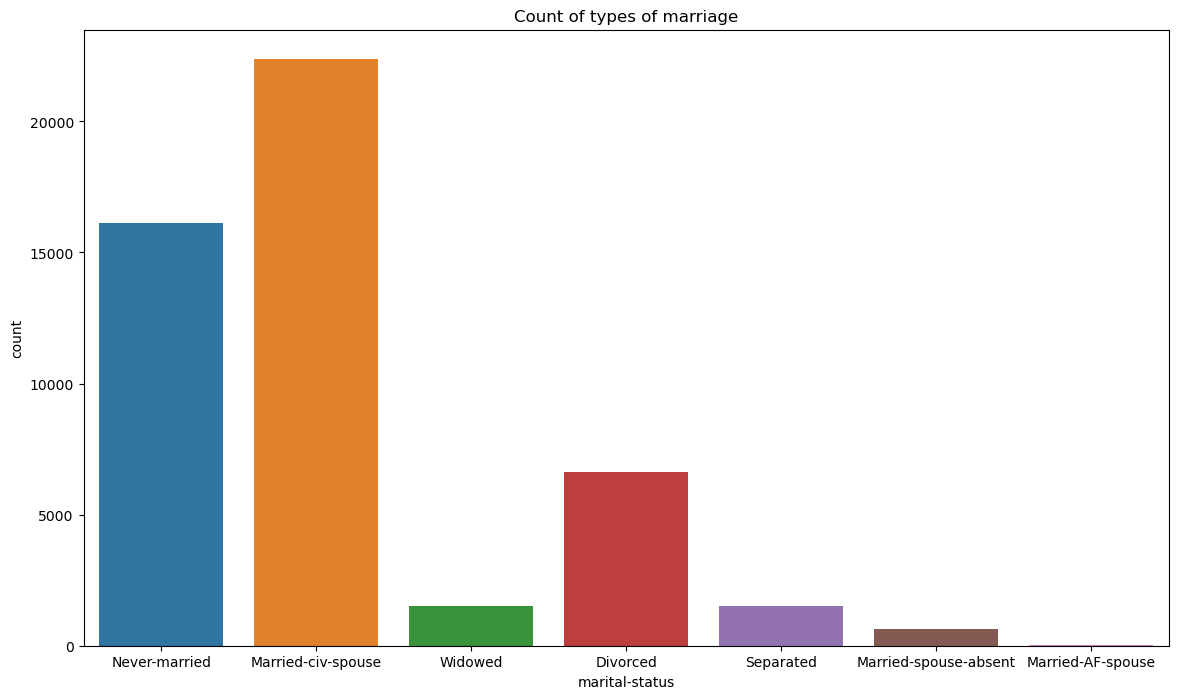

In [404]:
plt.figure(figsize=(14,8))
sns.countplot(data=df, x='marital-status')
plt.title("Count of types of marriage")
plt.show()

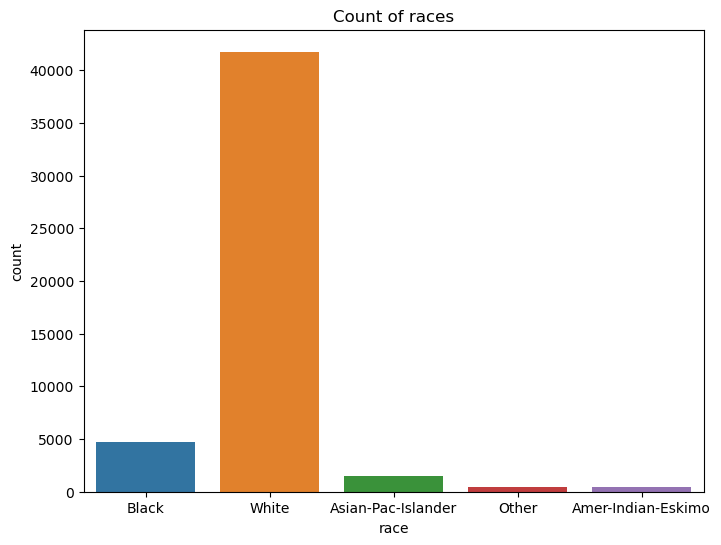

In [405]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='race')
plt.title("Count of races")
plt.show()

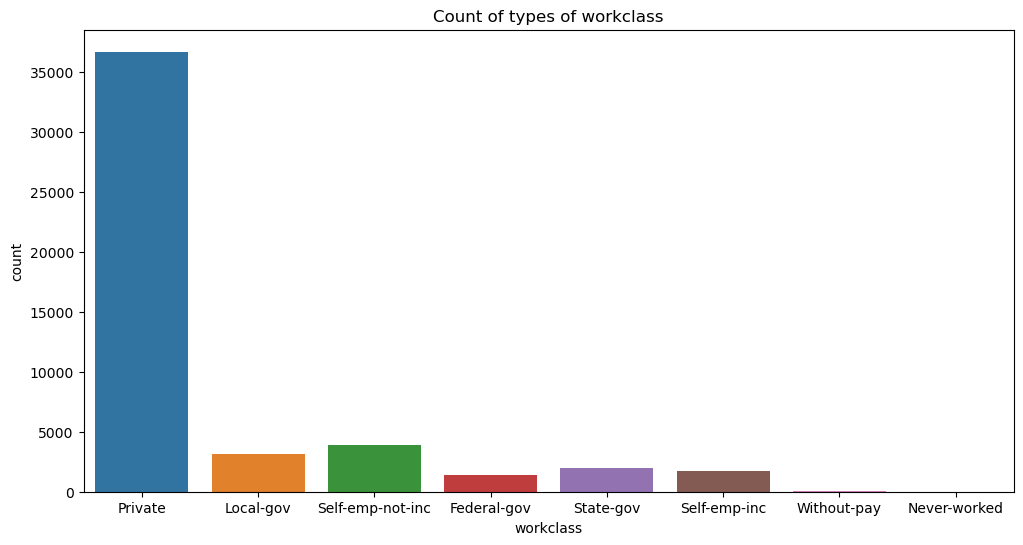

In [406]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='workclass')
plt.title("Count of types of workclass")
plt.show()

---
# Create models

In [407]:
le = LabelEncoder()
## converting all categorical variables to int
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])

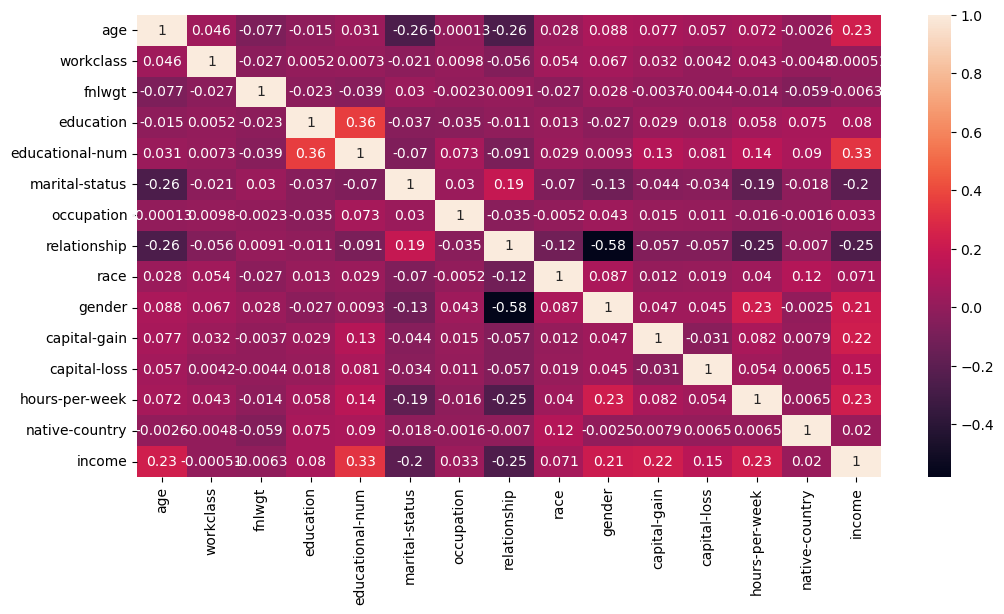

In [408]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

## VIF

In [409]:
# getting columns with non-categorical data and except the dependent column
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='income')):
        col_list.append(col)

# Returns a dataframe with VIF 
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0               age   8.797402
1         workclass   8.430978
2            fnlwgt   4.040712
3         education   9.200113
4   educational-num  18.713664
5    marital-status   4.089183
6        occupation   3.395637
7      relationship   2.670063
8              race  18.004991
9            gender   4.458864
10     capital-gain   1.045642
11     capital-loss   1.061849
12   hours-per-week  11.913022
13   native-country  28.986170


In [410]:
df.drop(columns=['native-country'], inplace=True)

In [411]:
# getting columns with non-categorical data and except the dependent column
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='income')):
        col_list.append(col)

# Returns a dataframe with VIF 
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0               age   8.334318
1         workclass   8.313534
2            fnlwgt   4.016854
3         education   9.066857
4   educational-num  17.794058
5    marital-status   3.962199
6        occupation   3.379268
7      relationship   2.541441
8              race  15.752747
9            gender   4.388749
10     capital-gain   1.043680
11     capital-loss   1.061391
12   hours-per-week  11.563991


In [412]:
df.drop(columns=['educational-num'], inplace=True)

In [413]:
# getting columns with non-categorical data and except the dependent column
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='income')):
        col_list.append(col)

# Returns a dataframe with VIF 
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           feature        VIF
0              age   8.131034
1        workclass   8.257524
2           fnlwgt   4.005105
3        education   7.338212
4   marital-status   3.926791
5       occupation   3.304399
6     relationship   2.529847
7             race  15.146924
8           gender   4.386514
9     capital-gain   1.034710
10    capital-loss   1.056725
11  hours-per-week  10.883814


In [414]:
df.drop(columns=['race'], inplace=True)

In [415]:
# getting columns with non-categorical data and except the dependent column
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='income')):
        col_list.append(col)

# Returns a dataframe with VIF 
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           feature        VIF
0              age   7.488096
1        workclass   7.881048
2           fnlwgt   3.950304
3        education   7.040289
4   marital-status   3.822669
5       occupation   3.271910
6     relationship   2.464351
7           gender   4.260303
8     capital-gain   1.034024
9     capital-loss   1.056714
10  hours-per-week  10.202212


In [416]:
df.drop(columns=['hours-per-week'], inplace=True)

In [417]:
# getting columns with non-categorical data and except the dependent column
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='income')):
        col_list.append(col)

# Returns a dataframe with VIF 
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0             age  6.862392
1       workclass  7.531298
2          fnlwgt  3.880906
3       education  6.533520
4  marital-status  3.813876
5      occupation  3.248154
6    relationship  2.446181
7          gender  3.926764
8    capital-gain  1.031940
9    capital-loss  1.055163


In [418]:
df.drop(columns=['workclass'], inplace=True)

In [419]:
# getting columns with non-categorical data and except the dependent column
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='income')):
        col_list.append(col)

# Returns a dataframe with VIF 
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0             age  6.070110
1          fnlwgt  3.839940
2       education  6.237158
3  marital-status  3.709499
4      occupation  3.212976
5    relationship  2.367932
6          gender  3.722133
7    capital-gain  1.031709
8    capital-loss  1.055158


In [420]:
df.drop(columns=['education'], inplace=True)

In [421]:
# getting columns with non-categorical data and except the dependent column
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='income')):
        col_list.append(col)

# Returns a dataframe with VIF 
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0             age  5.068227
1          fnlwgt  3.748493
2  marital-status  3.578567
3      occupation  3.181268
4    relationship  2.242025
5          gender  3.555848
6    capital-gain  1.031128
7    capital-loss  1.054447


In [422]:
df.drop(columns=['age'], inplace=True)

In [423]:
# getting columns with non-categorical data and except the dependent column
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='income')):
        col_list.append(col)

# Returns a dataframe with VIF 
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0          fnlwgt  3.474908
1  marital-status  3.515105
2      occupation  2.938359
3    relationship  2.158293
4          gender  2.968926
5    capital-gain  1.024409
6    capital-loss  1.047776


## Logistic Regression

In [424]:
X = df.drop(columns=['income'])
y = df['income']

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [426]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [427]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [428]:
y_pred = lr.predict(X_test)

In [429]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score ', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[7243  236]
 [1647  643]]
Accuracy Score  0.8072474152932746
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      7479
           1       0.73      0.28      0.41      2290

    accuracy                           0.81      9769
   macro avg       0.77      0.62      0.65      9769
weighted avg       0.80      0.81      0.77      9769



## Decision Tree

In [430]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [431]:
y_pred = dec_tree.predict(X_test)

In [432]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score ', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[6501  978]
 [ 953 1337]]
Accuracy Score  0.8023339133995291
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      7479
           1       0.58      0.58      0.58      2290

    accuracy                           0.80      9769
   macro avg       0.72      0.73      0.73      9769
weighted avg       0.80      0.80      0.80      9769



## Random Forest

In [433]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train,y_train)

RandomForestClassifier()

In [434]:
y_pred = rand_forest.predict(X_test)

In [435]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score ', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[6554  925]
 [ 940 1350]]
Accuracy Score  0.8090899785034292
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      7479
           1       0.59      0.59      0.59      2290

    accuracy                           0.81      9769
   macro avg       0.73      0.73      0.73      9769
weighted avg       0.81      0.81      0.81      9769



## Conclusion:
The **Random Forest** performs slightly better among the three models